In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from fractions import Fraction
from statistics import mean
from collections import defaultdict
from matplotlib.patches import Rectangle

In [2]:
def get_zone_ranges(strike_zone, width_zones, height_zones):
    width, height = strike_zone
    
    width_start = -1 * (width / 2)
    width_zone_length = width / width_zones

    height_start = -1 * (height / 2)
    height_zone_length = height / height_zones

    return [
        (round(x1, 3), round(x2, 3))
        for x1 in [ width_start + (i * width_zone_length) for i in range(width_zones) ]
        for x2 in reversed([ height_start + (i * height_zone_length) for i in range(height_zones) ])
    ], width_zone_length, height_zone_length

def label_zones(zones):
    return [
        (i + 1, zone)
        for i, zone in enumerate(zones)
    ]
    
def find_zone(x, y, zones_with_labels, zone_width, zone_height):
    for item in sorted(zones_with_labels, key=lambda a: a[0]):
        _, (zone_x, zone_y) = item
        if (x >= zone_x and x <= round(zone_x + zone_width, 3)) and (y >= zone_y and y <= round(zone_y + zone_height, 3)):
            return item

    return None

In [3]:
n_width_zones = 2
n_height_zones = 2

strike_zone = (17, 24)

zones, zone_width, zone_height = get_zone_ranges(strike_zone, n_width_zones, n_height_zones)
zones_with_labels = label_zones(zones)

In [4]:
def is_strike(x, y) -> bool:
    return abs(x) <= 8.5 and abs(y) <= 12

def get_strike_zone_percentage_by_pitch_type_dec(pitches: list, pitch_type: str) -> float:
    return mean(
        map(
            lambda pitch: int(is_strike(pitch[1], pitch[2])),
            filter(
                lambda pitch: pitch[0] == pitch_type,
                pitches
            )
        )
    )

def group_pitches(pitches: list) -> dict:
    pitch_mappings = defaultdict(lambda: { 'strikes': 0, 'total': 0 })
    for pt, x, y in pitches:
        pitch_mappings[pt]['strikes'] += int(is_strike(x, y))
        pitch_mappings[pt]['total'] += 1

    return pitch_mappings

def get_strike_zone_percentage_by_pitch_type(pitches: list, pitch_type: str) -> float:
    pitch_mappings = group_pitches(pitches)
    
    observation = pitch_mappings[pitch_type]
    return float(Fraction(observation['strikes'], observation['total']))

pitches = [
    ['FB', 2.2, -5.8],
    ['SL', 3, 5],
    ['FB', 8.5, -5.8],
    ['FB', -8.5, -5.8],
    ['FB', -8.55, -5.8],
]

print('declarative:', get_strike_zone_percentage_by_pitch_type_dec(pitches, 'FB'))
print('imperative:', get_strike_zone_percentage_by_pitch_type(pitches, 'FB'))

declarative: 0.75
imperative: 0.75


In [5]:
possible_x = np.linspace(-13, 13, 1000).tolist()
possible_y = np.linspace(-18, 18, 1000).tolist()

def generate_pitch():
    return (
        random.choice(possible_x),
        random.choice(possible_y),
    )

pitch_sequence = [
    ['FB', *loc]
    for loc in ( generate_pitch() for _ in range(15) )
]

strikes = list(filter(lambda a: is_strike(a[1], a[2]), pitch_sequence))
balls = list(filter(lambda a: not is_strike(a[1], a[2]), pitch_sequence))

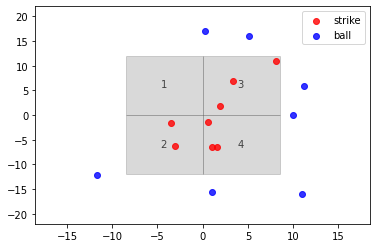

perc of strikes: 0.5333333333333333


In [6]:
fig, ax = plt.subplots()

for label, zone in zones_with_labels:
    x1, x2 = zone
    ax.add_patch(
        Rectangle(
            (x1, x2),
            zone_width,
            zone_height,
            alpha=0.15,
            facecolor='k',
            edgecolor='k',
            linewidth=1
        )
    )

    offset_x = (zone_width/2) - .4
    offset_y = (zone_height/2) - .4
    ax.annotate(label, xy=(x1 + offset_x, x2 + offset_y), alpha=.7)

ax.scatter([ row[1] for row in strikes ], [ row[2] for row in strikes ], c='r', label='strike', alpha=.8)
ax.scatter([ row[1] for row in balls ], [ row[2] for row in balls ], c='b', label='ball', alpha=.8)

x_zone, y_zone = strike_zone
plt.xlim(-1 *((x_zone / 2) + 10), ((x_zone / 2) + 10))
plt.ylim(-1 * ((y_zone / 2) + 10), ((y_zone / 2) + 10))

plt.legend()
plt.show()

print(
    'perc of strikes:',
    get_strike_zone_percentage_by_pitch_type(pitch_sequence, 'FB')
)

In [7]:
cluster_strikes_by_zone = [
    ((x, y), find_zone(x, y, zones_with_labels, zone_width, zone_height)[0])
    for _, x, y
    in strikes
]

cluster_strikes_by_zone

[((-3.5525525525525534, -1.6036036036036023), 2),
 ((1.0020020020020013, -6.504504504504505), 4),
 ((-3.11011011011011, -6.252252252252253), 2),
 ((3.2922922922922915, 6.972972972972972), 3),
 ((1.626626626626626, -6.36036036036036), 4),
 ((0.611611611611611, -1.4594594594594597), 4),
 ((1.9129129129129137, 1.8918918918918912), 3),
 ((8.055055055055053, 10.972972972972972), 3)]